<h1 align=center><font size = 5> SVM (Support Vector Machines)</font></h1>

En este ejercicio, utilizarás Máquinas de Soporte Vectorial (SVM) (Support Vector Machines) para construir y entrenar un modelo utilizando registros de células humanas para luego clasificarlas en benignas o malignas.

SVM trabaja enlazando datos con un dimensión espacial de forma tal que los puntos de datos sean categorizados, inclusive cuando los datos no son linealmente separables. Un separador entre categorías primero se encuentra, luego los datos se transorman para que el separador pueda dibujarse como un hiperplane. Luego, rasgos de nuevos datos se pueden utilizar para predecir el grupo al cual un nuevo registro debería pertencer.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('../Datasets/cell_samples.csv', sep = ',')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


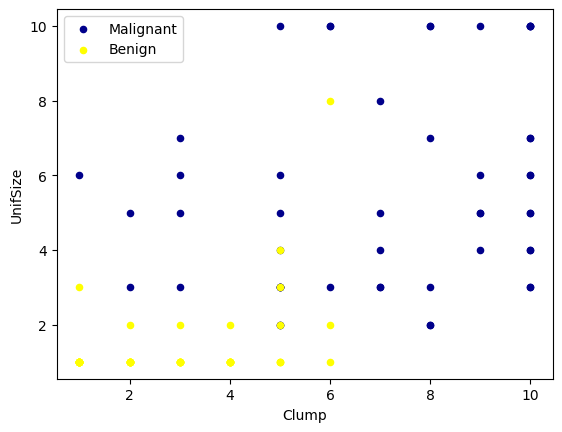

In [52]:
ax = df[df['Class'] == 4][0:50].plot(kind = 'scatter', x ='Clump', y ='UnifSize',color = 'DarkBlue', label = 'Malignant')
df[df['Class'] == 2][0:50].plot(kind = 'scatter', x ='Clump', y ='UnifSize',color = 'yellow', label = 'Benign', ax = ax)
plt.show()

Vemos la distribucion de los datos en la clase dependiente

<AxesSubplot: xlabel='Class', ylabel='Count'>

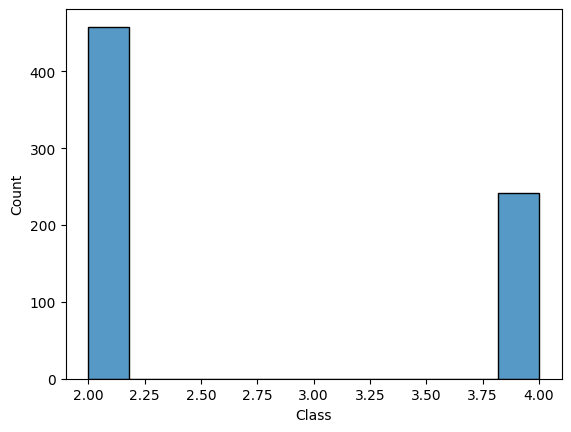

In [13]:
sns.histplot(df['Class'])

In [14]:
df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

Luego de ver la cantidad de valores que toman cada columna. Nos damos cuenta de que hay un error en los valores que se les asigna a la Columna 'BareNuc', hay filas que tienen como valor = '?', Por ende procedemos a eliminarlas 

In [32]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [34]:
X = df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
y = df['Class']

### Hacemos el Train/test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state= 42)
print('Shape de Train', X_train.shape, y_train.shape)
print('Shape de Test', X_test.shape, y_test.shape)

Shape de Train (478, 9) (478,)
Shape de Test (205, 9) (205,)


#### Importamos el Modelo

In [53]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred = clf.predict(X_test)

## Metrics <br>
En primer lugar utilizamos la matriz de confusion

In [68]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[125,   2],
       [  6,  72]], dtype=int64)

Luego F1_Score

In [70]:
f1_score(y_test, y_pred, average='weighted')

0.9607646455901523